In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm
import time
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


In [ ]:
data_train=pd.read_csv("./mnist_train.csv")
data_test=pd.read_csv("./mnist_test.csv")

In [3]:
print(data_train)
#The mnist_train.csv file contains the 60,000 training examples and labels. 

       label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \

0          5    0    0    0    0    0    0    0    0    0  ...      0      0   

1          0    0    0    0    0    0    0    0    0    0  ...      0      0   

2          4    0    0    0    0    0    0    0    0    0  ...      0      0   

3          1    0    0    0    0    0    0    0    0    0  ...      0      0   

4          9    0    0    0    0    0    0    0    0    0  ...      0      0   

...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   

59995      8    0    0    0    0    0    0    0    0    0  ...      0      0   

59996      3    0    0    0    0    0    0    0    0    0  ...      0      0   

59997      5    0    0    0    0    0    0    0    0    0  ...      0      0   

59998      6    0    0    0    0    0    0    0    0    0  ...      0      0   

59999      8    0    0    0    0    0    0    0    0    0  ...      0      0   



       28x21  28x22  28x23

In [75]:
print(data_test)
## The mnist_test.csv contains 10,000 test examples and labels. 
# Each row consists of 785 values: the first value is the label (a number from 0 to 9) and the remaining 784 values are the pixel values (a number from 0 to 255)

      label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \

0         7    0    0    0    0    0    0    0    0    0  ...      0      0   

1         2    0    0    0    0    0    0    0    0    0  ...      0      0   

2         1    0    0    0    0    0    0    0    0    0  ...      0      0   

3         0    0    0    0    0    0    0    0    0    0  ...      0      0   

4         4    0    0    0    0    0    0    0    0    0  ...      0      0   

...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...    ...    ...   

9995      2    0    0    0    0    0    0    0    0    0  ...      0      0   

9996      3    0    0    0    0    0    0    0    0    0  ...      0      0   

9997      4    0    0    0    0    0    0    0    0    0  ...      0      0   

9998      5    0    0    0    0    0    0    0    0    0  ...      0      0   

9999      6    0    0    0    0    0    0    0    0    0  ...      0      0   



      28x21  28x22  28x23  28x24  28x2

In [3]:
data_train.shape

(60000, 785)

In [4]:
data_test.shape

(10000, 785)

In [5]:
#Null check
data_test.isnull().sum().sum()

0

In [6]:
data_train.isnull().sum().sum()

0

In [7]:
#Checking the classes
list(np.sort(data_train['label'].unique()))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
#Split data
X_train=data_train[data_train.columns[1:]] 
y_train=data_train['label']
X_test=data_test[data_test.columns[1:]]
y_test=data_test['label']

In [79]:
print(y_train)

0        5

1        0

2        4

3        1

4        9

        ..

59995    8

59996    3

59997    5

59998    6

59999    8

Name: label, Length: 60000, dtype: int64


In [9]:
#After Spliting, checking the pixel range 
print(np.max(np.max (X_train)))
print(np.min(np.min (X_train)))
print(np.max(np.max (y_train)))
print(np.min(np.min (y_train)))
print(np.max(np.max (X_test)))
print(np.min(np.min (X_test)))
print(np.max(np.max (y_test)))
print(np.min(np.min (y_test)))


255

0

9

0

255

0

9

0


c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'

  return reduction(axis=axis, out=out, **passkwargs)

c:\Users\eimai\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'

  return reduction(axis=axis, out=out, **passkwargs)


In [10]:
#Scaling the data
scaler = MinMaxScaler(feature_range=(0,1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [15]:
print((y_test))

0       7

1       2

2       1

3       0

4       4

       ..

9995    2

9996    3

9997    4

9998    5

9999    6

Name: label, Length: 10000, dtype: int64


In [17]:
#Create and fit our SVM model with linear kernel
clf = svm.SVC(kernel='linear')
start_time=time.time()
clf.fit(X_train,y_train)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")

#Start time and get predicitions
start_time=time.time()
y_pred =clf.predict(X_test)
end_time=time.time()
print(f"testing time: {end_time - start_time } s\n")

#Check Accuracy & f-score of the model
print("accuracy:", metrics.accuracy_score(y_true=y_test,y_pred=y_pred),"\n")
print("f1 score :", metrics.f1_score(y_test, y_pred,average='macro'),"\n")

training time: 184.3138303756714 s



testing time: 31.371119022369385 s



accuracy: 0.9403 



f1 score : 0.9394043336311627 




In [18]:
#Create and fit our SVM model with rbf
rbf_svm = svm.SVC(kernel='rbf')
start_time=time.time()
rbf_svm.fit(X_train, y_train)
end_time=time.time()
print(f"training time: {end_time - start_time} s\n")

#Start time and get predicitions
start_time=time.time()
y_pred =rbf_svm.predict(X_test)
end_time=time.time()
print(f"testing time: {end_time - start_time } s\n")

#Check Accuracy & f-score of the model
print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred),"\n")
print("f1 score :", metrics.f1_score(y_test, y_pred,average='macro'),"\n")

training time: 167.9771227836609 s



testing time: 63.992523431777954 s



accuracy: 0.9793 



f1 score : 0.9792309295231718 




In [21]:
#With rbf kernel we had better results so cross-validation will follow finding the most suitables parameters

hyperparametres=[{'C':[5,10],'gamma':[0.01,0.001,0.0001]}]
kf=KFold(n_splits=5,shuffle=True,random_state=10)
rbf_svm = svm.SVC(kernel='rbf')
grid_search=GridSearchCV(estimator=rbf_svm,param_grid=hyperparametres,scoring='accuracy',cv=kf,verbose=10,return_train_score=True)
grid_search.fit(X_train,y_train)



Fitting 5 folds for each of 6 candidates, totalling 30 fits

[CV 1/5; 1/6] START C=5, gamma=0.01.............................................

[CV 1/5; 1/6] END C=5, gamma=0.01;, score=(train=0.998, test=0.983) total time= 2.7min

[CV 2/5; 1/6] START C=5, gamma=0.01.............................................

[CV 2/5; 1/6] END C=5, gamma=0.01;, score=(train=0.998, test=0.981) total time= 2.6min

[CV 3/5; 1/6] START C=5, gamma=0.01.............................................

[CV 3/5; 1/6] END C=5, gamma=0.01;, score=(train=0.998, test=0.984) total time= 2.7min

[CV 4/5; 1/6] START C=5, gamma=0.01.............................................

[CV 4/5; 1/6] END C=5, gamma=0.01;, score=(train=0.998, test=0.981) total time= 2.6min

[CV 5/5; 1/6] START C=5, gamma=0.01.............................................

[CV 5/5; 1/6] END C=5, gamma=0.01;, score=(train=0.998, test=0.980) total time= 2.6min

[CV 1/5; 2/6] START C=5, gamma=0.001............................................

[CV 1/5

GridSearchCV(cv=KFold(n_splits=5, random_state=10, shuffle=True),
             estimator=SVC(),
             param_grid=[{'C': [5, 10], 'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=10)

In [22]:
# cv results

cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,98.385529,2.478420,59.980012,1.155750,5,0.01,"{'C': 5, 'gamma': 0.01}",0.982667,0.981417,0.983750,...,0.981683,0.001368,2,0.998062,0.998042,0.997792,0.998167,0.998125,0.998038,0.000131
1,127.931043,1.840288,77.118903,0.295957,5,0.001,"{'C': 5, 'gamma': 0.001}",0.948000,0.948000,0.949500,...,0.948433,0.000556,4,0.955708,0.954750,0.954521,0.954604,0.954937,0.954904,0.000426
2,277.580876,4.584969,134.479030,2.100241,5,0.0001,"{'C': 5, 'gamma': 0.0001}",0.921750,0.922667,0.926917,...,0.923150,0.001920,6,0.925125,0.925583,0.924583,0.925042,0.925604,0.925188,0.000380
3,98.007842,0.803203,60.871816,0.594030,10,0.01,"{'C': 10, 'gamma': 0.01}",0.982417,0.981500,0.984917,...,0.982000,0.001651,1,0.999500,0.999687,0.999583,0.999583,0.999521,0.999575,0.000065
4,109.220186,0.518381,68.277699,0.353082,10,0.001,"{'C': 10, 'gamma': 0.001}",0.953583,0.955500,0.955250,...,0.954433,0.000844,3,0.963375,0.963375,0.963208,0.963313,0.963771,0.963408,0.000191
5,210.950876,0.609378,111.674948,0.714778,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.928083,0.927583,0.932333,...,0.929283,0.001699,5,0.932688,0.932979,0.931417,0.932000,0.933000,0.932417,0.000617


In [56]:
# Converting C to numeric type for plotting on x-axis

cv_results['param_C'] = cv_results['param_C'].astype('int')

In [57]:
#plot
plt.figure(figsize=(16,8))

<Figure size 1600x800 with 0 Axes>

<Figure size 1600x800 with 0 Axes>

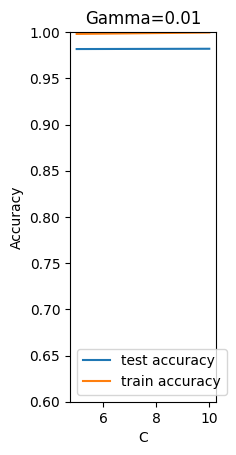

In [72]:
# Subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale("linear")


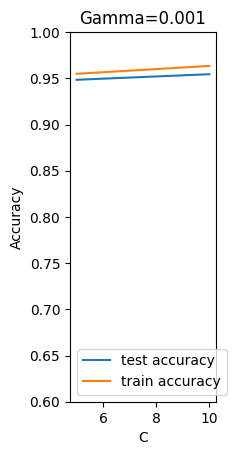

In [68]:
# Subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale('linear')

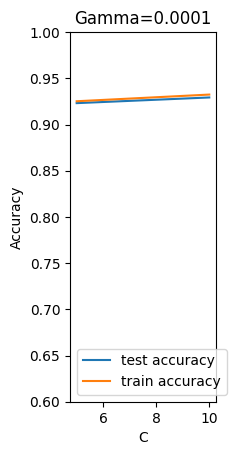

In [69]:
# Subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='lower left')
plt.xscale('linear')


In [70]:
# Printing the optimal accuracy score and hyperparametres

best_score = grid_search.best_score_
best_hyperparametres =grid_search.best_params_

print("The best test score is {0} corresponding to hyperparametres {1}".format(best_score,best_hyperparametres))

The best test score is 0.982 corresponding to hyperparametres {'C': 10, 'gamma': 0.01}


In [19]:
#Training the model with the most suitable parametres that cross -valide show

best_rbf_model =svm.SVC(C=10, gamma=0.01, kernel="rbf")
start_time=time.time()
best_rbf_model.fit(X_train, y_train)
end_time=time.time()
print(f"training time:{end_time-start_time}s\n")

#Make predictions

start_time=time.time()
y_pred = best_rbf_model.predict(X_test)
end_time=time.time()
print(f"testing time:{end_time-start_time} s\n")

#Metrics
print("accuracy", metrics.accuracy_score(y_test, y_pred), "\n")
print("f1 score :",metrics.f1_score(y_test, y_pred,average='macro'), "\n")

training time:157.62877297401428s



testing time:59.311994314193726 s



accuracy 0.9833 



f1 score : 0.9831850460322599 




In [30]:
#The len from support vectors
len(best_rbf_model.support_vectors_)


10867

In [31]:
#K-Nearest Neighbors


kVals=range(1,30,2)
accuracies=[]

for k in range(1,30,2): 

   modelknn=KNeighborsClassifier(n_neighbors=k)

   start_time=time.time()
   modelknn.fit(X_train,y_train)
   end_time=time.time()
   print (f" KNN training time:{end_time-start_time} s\n")

   start_time=time.time()
   score=modelknn.score(X_test,y_test)
   end_time=time.time()
   print (f"KNN testing time:{end_time-start_time} s\n")
   
   print("k=%d,accuracy=%.2f%%" % (k,score*100))
   accuracies.append(score)

#Find the K with the largest accuracy
i=int(np.argmax(accuracies))
print("k=%d achieved highest accuracy of %.2f%% " % (kVals[i],
	accuracies[i] * 100))



 KNN training time:0.1580355167388916 s



KNN testing time:7.947803497314453 s



k=1,accuracy=96.91%

 KNN training time:0.17504000663757324 s



KNN testing time:7.491699934005737 s



k=3,accuracy=97.05%

 KNN training time:0.15003347396850586 s



KNN testing time:7.498701572418213 s



k=5,accuracy=96.88%

 KNN training time:0.14904236793518066 s



KNN testing time:7.565708160400391 s



k=7,accuracy=96.94%

 KNN training time:0.15003323554992676 s



KNN testing time:7.524707555770874 s



k=9,accuracy=96.59%

 KNN training time:0.1500415802001953 s



KNN testing time:7.511695623397827 s



k=11,accuracy=96.68%

 KNN training time:0.15503525733947754 s



KNN testing time:7.5907227993011475 s



k=13,accuracy=96.53%

 KNN training time:0.15004301071166992 s



KNN testing time:7.522698640823364 s



k=15,accuracy=96.33%

 KNN training time:0.1490340232849121 s



KNN testing time:7.552714586257935 s



k=17,accuracy=96.30%

 KNN training time:0.1490330696105957 s



KNN testin

In [24]:
#NCC
modelncc=NearestCentroid()
start_time=time.time()
modelncc.fit(X_train,y_train)
end_time=time.time()
print (f"NCC training time:{end_time-start_time} s\n")

start_time=time.time()
score=modelncc.score(X_test,y_test)
end_time=time.time()
print (f"NCC testing time:{end_time-start_time} s\n")
print("accuracy=%.2f%%" % (score*100))


NCC training time:0.488109827041626 s



NCC testing time:0.03800821304321289 s



accuracy=82.03%
